# Ejercicios

In [1]:
import numpy as np

---
## Convoluciones de arrays

:::{exercise}
:label: chapther2-convolution

Dadas dos funciones de variable real $f$ y $g$, definimos la [**convolución**](https://en.wikipedia.org/wiki/Convolution) de $f$ y $g$ como

$$
(f*g)(x) = \int_\mathbb{R} f(t)g(x - t)dt.
$$

La versión discreta de la anterior definición puede ser la siguiente. Datos $f=(f_0, \dots, f_{n-1})$ y $g=(g_0, \dots, g_{m-1})$ dos vectores (representados por arrays unidimensionales) de tamaño $n$ y $m$, respectivamente, definimos el array `conv` de dimensión `n + m - 1` cuya componente $k$ vale

$$
\sum_{i + m -1 = k + j}f_ig_j
$$

para $0 \leq k \leq n + m - 1$.

Crea una función `conv` que tome como inputs dos arrays y devuelva la convolución de ambos. Por ejemplo

```
arr1 = np.arange(10)
arr2 = np.arange(5)
conv(arr1, arr2)
>>> [ 0  4 11 20 30 40 50 60 70 80 50 26  9  0]
```

:::

In [11]:
def conv(f, g):
    n = f.size
    m = g.size
    conv = np.zeros(n + m - 1)
    for k in range(n + m - 1):
        terms = []
        for i in range(n):
            for j in range(m):
                if i + m - 1 == k + j:
                    terms.append(f[i]*g[j])
        conv[k] = sum(terms)
    return conv


f = np.arange(10)
g = np.arange(5)
conv(f, g)

array([ 0.,  4., 11., 20., 30., 40., 50., 60., 70., 80., 50., 26.,  9.,
        0.])

---
## Procesando imágenes con numpy

:::{exercise}
:label: chapter2-images

Una de las posibles técnicas que existen para comprimir una imagen es utilizar [la descomposición SVD (Singular Value Decomposition)](https://en.wikipedia.org/wiki/Singular_value_decomposition) que nos permite expresar una matrix $A$ de dimensiones $n\times m$ como un producto

$$
A = U \Sigma V^t
$$

donde $U$ y $V$ son cuadradas de dimensiones $n$ y $m$ respectivamente y $\Sigma$ es diagonal y está formada por los [valores singulares](https://en.wikipedia.org/wiki/Singular_value) de $A$ ordenados de mayor a menor (siempre son números reales y positivos).

Recuerda que una imagen no es más que un conjunto de 3 matrices, cada una representando la intensidad de la grilla de píxeles para cada color (rojo, verde y azul). Una forma de comprimir una imagen consiste en quedarse con los $k$ primeros valores singulares para cada color e intercambiar $k$ por una se las dimensiones que representan el alto o el ancho de la imagen.

Crea una función `aproxima_img` que tome un array de dimensión $(3, h, w)$ y devuelva otra imagen aproximada de dimensión $(3, h, w)$ utilizando los k primeros valores singulares. Para ello,
1. Utiliza la función `scipy.misc.face` para generar una imagen de prueba, o también puedes importar una utilizando `im = cv2.imread("img.jpg")`. Puedes visualizar imágenes con este formato a través del la función `imshow` de `matplotlib.pyplot` (a veces hay que cambiar de orden los canales).
2. Utiliza la función `svd` de `np.linalg` para realizar la descomposición SVD. Mucho cuidado con las dimensiones que espera la función.
3. Otras funciones que pueden ser útiles para el ejercicio: `np.transpose`, `np.zeros`, `np.fill_diagonal`, `np.clip`.

:::

In [27]:
import scipy
import matplotlib.pyplot as plt
import cv2

im = scipy.misc.face()
im_giralda = cv2.imread("giralda.jpg")

<ipython-input-27-658b7694cb54>:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  im = scipy.misc.face()


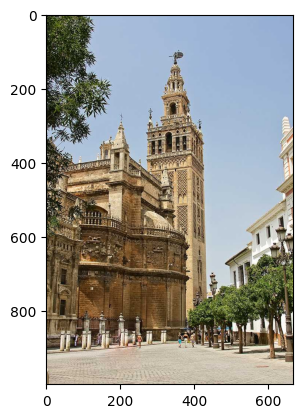

In [29]:
plt.imshow(im_giralda[:, :, [2, 1, 0]])

In [38]:
h, w, _ = im_giralda.shape

In [47]:
h, w

(1000, 667)

In [41]:
from numpy.linalg import svd

im_giralda_modificada = np.transpose(im_giralda, (2, 0, 1))
U, s, Vh = svd(im_giralda_modificada)

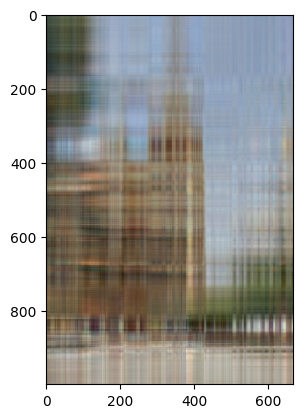

In [74]:
k = 5
S = np.zeros((3, w, w))
for c in range(3):
    np.fill_diagonal(S[c], s[c])
im_comprimida = U[:, :, :k] @ S[:, :k, :] @ Vh
im_comprimida = (im_comprimida - im_comprimida.min()) / (im_comprimida.max() - im_comprimida.min())
im_final = np.transpose(im_comprimida, (1, 2, 0))[:, :, [2, 1, 0]]
plt.imshow(im_final)


:::{exercise}
:label: chapter2-images-convolution

Importa una imagen de tu elección utilizando la función `imread` de la librería `cv2`. Crea un array `kernel` de dimensión $(n, n)$ y realiza la convolución de tu imagen con `kernel` mediante la función [`scipy.signal.convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d) (parámetro `mode='same'`). Si tu imagen tiene varios canales para los colores, aplica el mismo kernel a cada canal.

Algunos ejemplos interesantes de kernel pueden ser los siguientes:

- $n = 3$ con valores

$$
\begin{pmatrix}
-3 & 0 & 3\\
-10 & 0 & 10\\
-3 & 0 & 3
\end{pmatrix}
$$

- transpuesta del anterior,

$$
\begin{pmatrix}
-3 & -10 & -3\\
0 & 0 & 0\\
3 & 10 & 3
\end{pmatrix}
$$

- $n \approx 50$, generados con `scipy.signal.windows.gaussian` (puedes utilizar la función `np.outer` para realizar un producto exterior)

- Operador complejo de Sharr
```
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],

                   [-10+0j, 0+ 0j, +10 +0j],

                   [ -3+3j, 0+10j,  +3 +3j]])
```
Puedes visualizar las imágenes con `matplotlib.pyplot.imshow`.

:::

(1000, 667)

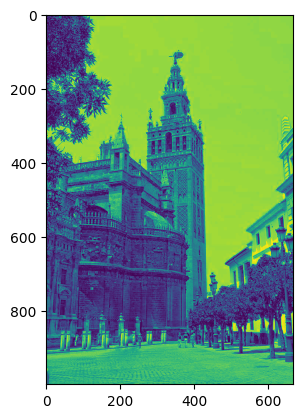

In [77]:
giralda = im_giralda[:, :, 0]
plt.imshow(giralda)
giralda.shape

In [85]:
im_giralda.shape

(1000, 667, 3)

In [98]:
n = 20
v = scipy.signal.windows.gaussian(n, 1)
kernel = np.outer(v, v)

In [99]:
print(v)

[2.52616378e-20 2.04697171e-16 6.10193668e-13 6.69158609e-10
 2.69957850e-07 4.00652974e-05 2.18749112e-03 4.39369336e-02
 3.24652467e-01 8.82496903e-01 8.82496903e-01 3.24652467e-01
 4.39369336e-02 2.18749112e-03 4.00652974e-05 2.69957850e-07
 6.69158609e-10 6.10193668e-13 2.04697171e-16 2.52616378e-20]


In [100]:
import scipy
ret = np.zeros(im_giralda.shape)
for i in range(3):
    ret[:, :, i] = scipy.signal.convolve2d(
        im_giralda[:, :, i], kernel.T,
        mode="same"
    )

In [101]:
print(ret.shape)

(1000, 667, 3)


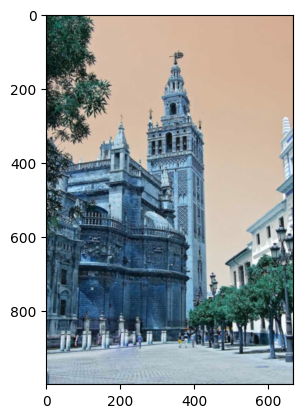

In [102]:
ret = (ret - ret.min()) / (ret.max() - ret.min())
plt.imshow(ret)

---
## Regresión Lineal

:::{exercise}
:label: chapter2-linear-regression

Considera un modelo de regresión lineal que consiste en estimar una variable $y$ como una suma ponderada de un cojunto de variables regresoras

$$
\hat{y} = \theta_0 + \theta_1x_1 + \dots \theta_nx_n
$$

donde

- $n$ es el conjunto de variables regresoras o *features*, $x_i$ el valor correspondiente.
- $\hat{y}$ es el valor predicho.
- $\theta_i$ son parámetros del modelo para $0 \leq i \leq n$.  

Podemos expresar dicha ecuación en formato matricial como

$$
\hat{y} =
\begin{pmatrix}
1 & x_1 & \cdots & x_n
\end{pmatrix}
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix}
=
\boldsymbol{x} \cdot \boldsymbol{\theta}.
$$

Dado un conjunto de $m$ observaciones, nuestro objetivo es encontrar $\boldsymbol{\theta}$ tal que se minimice nuestra aproximación lineal en términos de menores cuadrados

$$
\frac{1}{m}\sum_{i=1}^{m}
(\boldsymbol{x}_i \cdot \boldsymbol{\theta} - y_i)^2.
$$

El valor óptimo de los parámetros se puede calcular directamente

$$
\hat{\theta} = (\boldsymbol{X}^t\boldsymbol{X})^{-1}\boldsymbol{X}^ty
$$

donde

$$
\boldsymbol{X} =
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1n} \\
1 & x_{21} & \cdots & x_{2n} \\
\vdots & \vdots & \cdots & \vdots \\
1 & x_{m1} & \cdots & x_{mn}
\end{pmatrix}
$$

es el conjunto de observaciones de las variables regresoras e

$$
\hat{y}=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$

es el conjunto de observaciones de la variable objetivo.


Crea una clase `RegresionLineal` con dos métodos,
- `entrena`: toma como parámetros `X` e `y`, observaciones de las variables regresoras y objetivo, respectivamente, y calcula los coeficientes de la regresión lineal y los guarda en un atributo `_theta`.
- `transforma`: toma como parámetro una serie de observaciones nuevas `X` y devuelve una estimación `y_hat` de la varible objetivo utilizando el método descrito anteriormente.

Funciones que puede ser de ayuda: `np.linalg.inv`, `np.linalg.pinv`, `np.vstack`, `np.hstack`.

:::

In [105]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
ret = np.vstack((a, b, a))
np.vstack((ret, a))

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [1, 2, 3]])

In [106]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
ret = np.hstack((a, b, a))
np.hstack((ret, a))

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 1, 2, 3])

In [136]:
class RegresionLineal:
    def entrena(self, X: np.ndarray, y: np.ndarray):
        self._theta = np.linalg.inv(X.T @ X) @ X.T @ y

    def transforma(self, X: np.ndarray):
        y_hat = X @ self._theta
        return y_hat

In [138]:
n = 20
m = 500
X = np.linspace(-1, 1, m)
y = -5 + 8*X + np.random.randn(m)
X = X.reshape((m, n))
X = np.hstack((np.ones(m).reshape(m, 1), X))

In [139]:
print(X.shape)
print(y.shape)

(50, 2)
(50,)


In [140]:
y

array([-12.07138479, -13.05330976, -12.30973441, -11.46320839,
       -10.88177573, -12.09517009,  -9.49463607, -10.02115952,
       -10.81179953,  -9.38041474,  -8.28437883,  -9.28292337,
        -9.77973295,  -8.41466714,  -9.39253765,  -6.30435892,
        -6.56187333,  -9.62431838,  -9.08033994,  -7.32173858,
        -5.98043991,  -6.08453968,  -4.33927567,  -6.14008111,
        -4.36088648,  -4.03233517,  -4.54459737,  -3.69984803,
        -4.75900016,  -2.15688479,  -4.9113157 ,  -3.49536467,
        -2.95591481,  -2.31966105,  -1.91955907,  -1.12208564,
        -0.50058478,   0.56198314,  -0.46281322,   0.33134371,
        -1.20940969,   0.81700321,   0.51475479,   1.43280438,
         1.27921539,   2.46556578,   0.65738281,   3.98946003,
         1.02193463,   6.42544706])

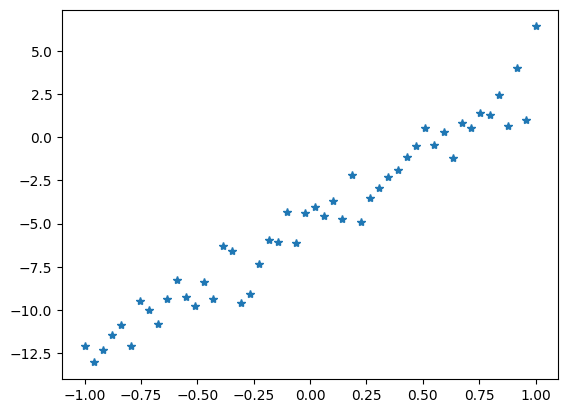

In [141]:
import matplotlib.pyplot as plt

plt.plot(X[:, 1], y, "*")

In [142]:
regresion_lineal = RegresionLineal()

regresion_lineal.entrena(X, y)
regresion_lineal._theta

array([-4.82254328,  8.01213967])

In [143]:
regresion_lineal.transforma(X)

array([-12.83468295, -12.50765684, -12.18063074, -11.85360463,
       -11.52657852, -11.19955241, -10.8725263 , -10.54550019,
       -10.21847408,  -9.89144797,  -9.56442186,  -9.23739575,
        -8.91036965,  -8.58334354,  -8.25631743,  -7.92929132,
        -7.60226521,  -7.2752391 ,  -6.94821299,  -6.62118688,
        -6.29416077,  -5.96713467,  -5.64010856,  -5.31308245,
        -4.98605634,  -4.65903023,  -4.33200412,  -4.00497801,
        -3.6779519 ,  -3.35092579,  -3.02389969,  -2.69687358,
        -2.36984747,  -2.04282136,  -1.71579525,  -1.38876914,
        -1.06174303,  -0.73471692,  -0.40769081,  -0.0806647 ,
         0.2463614 ,   0.57338751,   0.90041362,   1.22743973,
         1.55446584,   1.88149195,   2.20851806,   2.53554417,
         2.86257028,   3.18959638])